In [1]:
import os

current_dir = os.getcwd()
print('目前目錄：'+current_dir)

目前目錄：c:\Users\User\Dropbox\0_Coding\0_github_repo\my_analysis_projects\time_series_analysis\time_series_prediction\1_股價預測 - 比特幣


In [4]:

from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

1 - 爬取相關數據並存成csv file

In [ ]:
# 比特幣概念股歷史資料爬取
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

stock_name = ['台積電','精英','華碩','技嘉','微星','威盛','映泰','南亞科','承啟','麗臺','智原','華義','景碩','雙鴻','創意','利機','華擎','曜越','神準','世芯-KY','日月光投控','華星光','鈺創','青雲','茂達','撼訊','晶焱','東典光電','動力-KY','南電','瀚荃']
stock_list = ['2330.TW','2331.TW','2357.TW','2376.TW','2377.TW','2388.TW','2399.TW','2408.TW','2425.TW','2465.TW','3035.TW','3086.TWO','3189.TW','3324.TWO','3443.TW','3444.TWO','3515.TW','3540.TWO','3558.TWO','3661.TW','3711.TW','4979.TWO','5351.TWO','5386.TWO','6138.TWO','6150.TWO','6411.TWO','6588.TWO','6591.TW','8046.TW','8103.TW']
start_date = "2021-01-01"
end_date = "2023-12-31"

df_stock = pd.DataFrame()
for stock in stock_list:
  data = yf.download(stock, start = start_date, end = end_date)
  df_stock[stock] = data['Adj Close']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ModuleNotFoundError: No module named 'pandas_datareader'

ModuleNotFoundError: No module named 'pandas_datareader'

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
df_stock.to_csv('Data_StockPrice2.csv')

In [5]:
from pprint import pprint

Step 1 : 資料前處理。


1.   問題一：比特幣價格、比特幣網路聲量、比特幣概念股股價timestamp不一致。(開市日)
2.   清單項目



In [19]:
# 匯入資料

# 比特幣價格資料表
col_bitcoin_price = ['date','bitcoin_price','open']
df_bitcoin_price = pd.read_csv('Data_Bitcoin.csv')
df_bitcoin_price = df_bitcoin_price.iloc[:,:2] #取前二欄位
df_bitcoin_price.columns = ['date','bitcoin_price'] #重新設定欄位名稱
df_bitcoin_price = df_bitcoin_price.set_index('date')
df_bitcoin_price.index = pd.to_datetime(df_bitcoin_price.index,format='%m/%d/%Y') #將index文字轉換為日期格式 #四位數字年"%Y"、月份"%m"、日期"%d"，%M 是分鐘，%D是月/日/年的縮寫
df_bitcoin_price.index = df_bitcoin_price.index.strftime('%Y-%m-%d') # strftime - String Format Time
df_bitcoin_price = df_bitcoin_price.sort_index(ascending=True)

# 比特幣網路聲量資料表
col_bitcoin_buzz = ['date','news','news_senti','social_main','social_response','social','social_senti']
df_bitcoin_buzz = pd.read_csv('Data_Bitcoin_buzz.csv', names = col_bitcoin_buzz, header=0,index_col='date')
df_bitcoin_buzz.index = pd.to_datetime(df_bitcoin_buzz.index,format = '%Y/%m/%d')
df_bitcoin_buzz.index = df_bitcoin_buzz.index.strftime('%Y-%m-%d')

#合併比特幣價格與網路聲量 = df_feature
df_feature = pd.merge(df_bitcoin_price,df_bitcoin_buzz, left_index=True, right_index=True, how='inner')
df_feature.index = pd.to_datetime(df_feature.index,format = '%Y-%m-%d') #index 設定為時間格式
df_feature['bitcoin_price'] = df_feature['bitcoin_price'].str.replace(',','').astype(float)
df_feature['bitcoin_price'] = pd.to_numeric(df_feature['bitcoin_price'], errors='coerce')  #文件中的比特幣價格並非數字型態，必須先轉換；errors:'coerce不可轉換者皆轉回空值

#比特幣概念股股價
df_stock = pd.read_csv('Data_StockPrice2.csv', index_col='Date')
df_stock.index_name = 'Trading_Date'
df_stock.index = pd.to_datetime(df_stock.index,format='%Y-%m-%d')

#檢查各資料表屬性
print(df_feature.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2021-01-01 to 2023-12-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bitcoin_price    1095 non-null   float64
 1   news             1095 non-null   int64  
 2   news_senti       1095 non-null   float64
 3   social_main      1095 non-null   int64  
 4   social_response  1095 non-null   int64  
 5   social           1095 non-null   int64  
 6   social_senti     1095 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 68.4 KB
None


In [7]:
df_feature.columns

Index(['bitcoin_price', 'news', 'news_senti', 'social_main', 'social_response',
       'social', 'social_senti'],
      dtype='object')

In [20]:
# 解決問題一

# 找出最後一天開市日
df_feature['is_trading_day'] = df_feature.index.isin(df_stock.index)
df_feature['is_trading_day_next'] = df_feature['is_trading_day'].shift(-1,fill_value=False)
df_feature['is_last_trading_date'] = (df_feature['is_trading_day']==True)&(df_feature['is_trading_day_next']==False)
last_trading_date = df_feature[(df_feature['is_trading_day']==True)&(df_feature['is_trading_day_next']==False)].index

# 找出每個日期的下一個開市日
all_dates = pd.date_range(start=df_feature.index.min(), end=df_feature.index.max())
df_stock['Date'] = df_stock.index
df_stock_expanded = df_stock.reindex(all_dates, method='bfill')
df_stock_expanded = df_stock_expanded[['Date']]['Date'].shift(-1)
if 'next_trading_date' not in df_feature.columns:
  df_feature = pd.merge(df_feature, df_stock_expanded, left_index=True, right_index=True, how='inner')
  df_feature.rename(columns={'Date':'next_trading_date'},inplace=True)

print(df_feature.loc[last_trading_date[0]])

#計算最後交易日到下一個交易日前的比特幣價格與網路聲量平均值
for date in last_trading_date:
  #找到下一個交易日的前一天
  next_trading_date = df_feature.at[date,'next_trading_date']
  if pd.isna(next_trading_date):
    continue
  before_next_tradng_date = next_trading_date - pd.Timedelta(1,"d") # or days=1

  #計算平均
  if date != next_trading_date:
    avg_data = df_feature.loc[date:before_next_tradng_date,'bitcoin_price':'social_senti'].mean(numeric_only=True)
    df_feature.loc[date,'bitcoin_price':'social_senti'] = avg_data
print(df_feature.loc[last_trading_date[0]])

bitcoin_price                       40599.3
news                                     93
news_senti                             27.0
social_main                              53
social_response                         365
social                                  511
social_senti                            2.0
is_trading_day                         True
is_trading_day_next                   False
is_last_trading_date                   True
next_trading_date       2021-01-11 00:00:00
Name: 2021-01-08 00:00:00, dtype: object
bitcoin_price                       39647.8
news                              56.333333
news_senti                        13.523333
social_main                       36.333333
social_response                  407.333333
social                                500.0
social_senti                       1.276667
is_trading_day                         True
is_trading_day_next                   False
is_last_trading_date                   True
next_trading_date       2021-01-11 

In [24]:
predictors = ['bitcoin_price','news','news_senti','social_main','social_response','social','social_senti']
df_predictors = df_feature[predictors]
df_predictors = df_predictors[df_predictors.index.isin(df_stock.index)]
df_merged = df_predictors.join(df_stock, how='inner')
df_merged = df_merged.drop('Date',axis=1)

In [10]:
df_merged.columns

Index(['bitcoin_price', 'news', 'news_senti', 'social_main', 'social_response',
       'social', 'social_senti', '2330.TW', '2331.TW', '2357.TW', '2376.TW',
       '2377.TW', '2388.TW', '2399.TW', '2408.TW', '2425.TW', '2465.TW',
       '3035.TW', '3086.TWO', '3189.TW', '3324.TWO', '3443.TW', '3444.TWO',
       '3515.TW', '3540.TWO', '3558.TWO', '3661.TW', '3711.TW', '4979.TWO',
       '5351.TWO', '5386.TWO', '6138.TWO', '6150.TWO', '6411.TWO', '6588.TWO',
       '6591.TW', '8046.TW', '8103.TW'],
      dtype='object')

Step2: 視覺化探索性分析


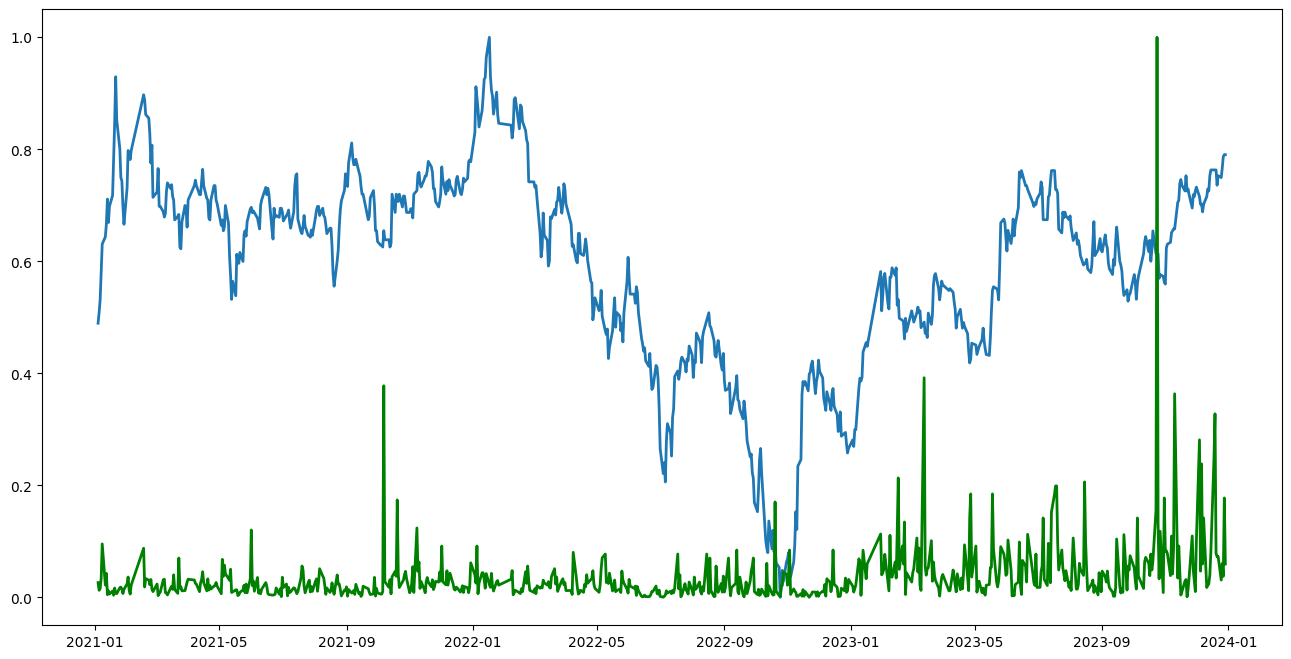

In [46]:
from sklearn.preprocessing import  MinMaxScaler
import matplotlib.pyplot as plt

# 資料準備
trading_date = df_merged.reset_index()['date']
col_features = ['bitcoin_price','news','news_senti','social_main','social_response','social','social_senti', '2330.TW']
df = df_merged[col_features]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
df_plot = pd.DataFrame(scaled_data, columns=col_features)
df_plot['date'] = trading_date
df_plot = df_plot.set_index('date')
df_plot

plt.figure(figsize=(16,8))
plt.plot(df_plot.index,df_plot['2330.TW'],linewidth=2, markersize=4)
plt.plot(df_plot.index,df_plot['news_senti'],color='green',linewidth=2, markersize=4)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping  #用於validation中找到最適當的模型(不過度擬合)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#數據預處理
df = df_merged[['bitcoin_price','news','news_senti','social_main','social_response','social','social_senti', '2330.TW']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)
# columns_to_scaled = df.columns[:-1]
# scaled_data = scaler.fit_transform(df.iloc[:, :-1])
# scaled_data = np.column_stack((scaled_data, df['2330.TW']))

# 創建訓練和測試數據集
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step),:]  # 所有特徵列
        X.append(a)
        y.append(data[i + time_step, -1]) # 目標股價列
    return np.array(X), np.array(y)

time_step = 200
X, y = create_dataset(scaled_data, time_step)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 建立LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 200, 50)           11800     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dense_34 (Dense)            (None, 25)                1275      
                                                                 
 dense_35 (Dense)            (None, 1)                 26        
                                                                 
Total params: 33,301
Trainable params: 33,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(421, 200, 8)

In [ ]:
#選擇優化契
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/200
21/21 [==============================] - 9s 202ms/step - loss: 0.0466 - val_loss: 0.0108
Epoch 2/200
21/21 [==============================] - 3s 156ms/step - loss: 0.0105 - val_loss: 0.0071
Epoch 3/200
21/21 [==============================] - 5s 220ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 4/200
21/21 [==============================] - 4s 174ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 5/200
21/21 [==============================] - 3s 154ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 6/200
21/21 [==============================] - 3s 156ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 7/200
21/21 [==============================] - 5s 226ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 8/200
21/21 [==============================] - 3s 158ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/200
21/21 [==============================] - 3s 156ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 10/200
21/21 [==============================] - 3s 157ms/step - loss: 0.0036 - val_lo

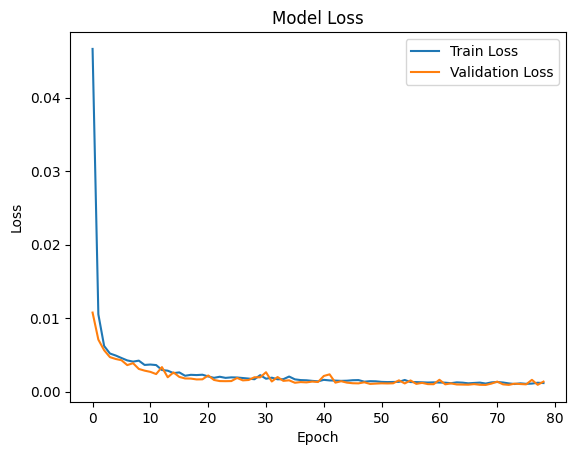

In [ ]:

# 訓練模型
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=16,epochs=200, callbacks=[early_stopping])

import matplotlib.pyplot as plt

# 畫出訓練和驗證的損失
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
temp_data = np.zeros_like(df)
temp_data[0:len(y_test), -1] = predictions.ravel()
predictions = temp_data[0:len(y_test), :]
predictions = scaler.inverse_transform(predictions)[:,-1]
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f"RMSE: {rmse}")

4/4 [==============================] - 1s 49ms/step
RMSE: 521.646948335317


In [ ]:

# 預測並計算誤差
predictions = model.predict(X_test)
predictions = predictions
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f"RMSE: {rmse}")


4/4 [==============================] - 1s 31ms/step
RMSE: 48.802345674830995


In [ ]:
import matplotlib.pyplot as plt

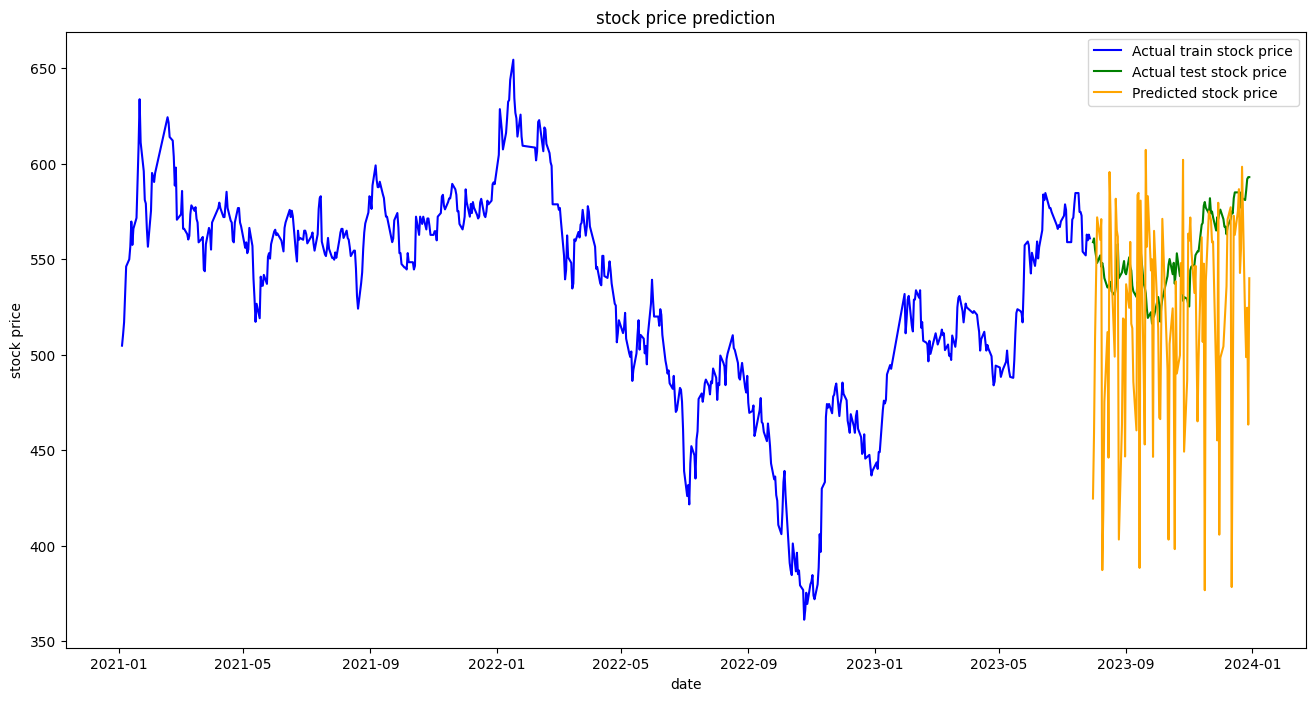

In [ ]:
train_size = len(y_train)
df_train_y = df_merged['2330.TW'].iloc[:time_step+len(y_train)+1]
df_test_y = df_merged['2330.TW'].iloc[time_step+len(y_train)+1:]
df_predictions = pd.Series(predictions.reshape(-1),index=df_test_y.index,name='new_prediction')

plt.figure(figsize=(16,8))
plt.plot(df_train_y.index, df_train_y, color='b', label='Actual train stock price')
plt.plot(df_test_y.index, df_test_y, color='g', label='Actual test stock price')
plt.plot(df_test_y.index, predictions, color='orange', label='Predicted stock price')
plt.title('stock price prediction')
plt.xlabel('date')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [ ]:
predictions

array([424.7207912 , 458.55977419, 508.6344702 , 571.93489617,
       560.15379487, 571.00772857, 387.25535393, 418.67683979,
       475.31657883, 511.84349592, 446.1344963 , 595.66449748,
       572.50292285, 542.38742521, 499.00105815, 581.67684039,
       565.10611587, 561.80254719, 403.26214761, 463.30322689,
       519.02103663, 518.3933308 , 446.7276092 , 536.90402093,
       524.57605589, 559.08565166, 516.22392813, 513.89285874,
       485.84514319, 460.40478616, 583.66018043, 584.74253129,
       388.38649228, 580.69291207, 490.0871687 , 453.03396538,
       607.24597507, 556.52089864, 582.98619922, 544.12521568,
       549.96234344, 446.54008735, 564.85929059, 513.82611945,
       467.09679373, 466.2959135 , 517.90761416, 571.15349249,
       492.36540063, 403.21422516, 505.6196158 , 524.28788336,
       494.05963318, 398.23956162, 538.44603233, 490.19167275,
       499.75018441, 548.02120697, 532.13611987, 602.03391433,
       449.26197216, 486.57104438, 563.38068064, 559.75